In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
train_path = '/content/drive/My Drive/datasets/lungnodemalignancy/train'
valid_path = '/content/drive/My Drive/datasets/lungnodemalignancy/test'

In [0]:
IMAGE_SIZE = [224, 224]

In [0]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
folders = glob(train_path+'/*')

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [0]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [0]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/datasets/lungnodemalignancy/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 5606 images belonging to 2 classes.


In [0]:
training_set[1].shape

AttributeError: ignored

In [0]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/datasets/lungnodemalignancy/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1085 images belonging to 2 classes.


In [0]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
 98/176 [===============>..............] - ETA: 11:37 - loss: 0.6782 - accuracy: 0.6460

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


176/176 [==============================] - 1900s 11s/step - loss: 0.6388 - accuracy: 0.6755 - val_loss: 0.4246 - val_accuracy: 0.7613
Epoch 2/5
176/176 [==============================] - 196s 1s/step - loss: 0.5269 - accuracy: 0.7376 - val_loss: 0.4954 - val_accuracy: 0.7032
Epoch 3/5
176/176 [==============================] - 196s 1s/step - loss: 0.4568 - accuracy: 0.7831 - val_loss: 0.8810 - val_accuracy: 0.6028
Epoch 4/5
176/176 [==============================] - 198s 1s/step - loss: 0.4599 - accuracy: 0.7824 - val_loss: 0.6899 - val_accuracy: 0.5770
Epoch 5/5
176/176 [==============================] - 196s 1s/step - loss: 0.3938 - accuracy: 0.8152 - val_loss: 1.0938 - val_accuracy: 0.4700


In [0]:
r

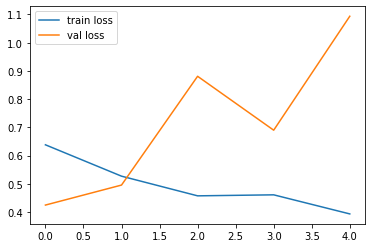

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [0]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/My Drive/datasets/lungnodemalignancy/facefeatures_new_model.h5')